In [18]:
from typing import TypedDict, Dict
from langgraph.graph import StateGraph, START, END

In [19]:
class AgentState(TypedDict):
    number1: int
    number2: int
    operation1: str
    finalNumber1: int
    number3: int
    number4: int
    operation2: str
    finalNumber2: int

In [20]:
def add_number_1(state: AgentState) -> AgentState:
    """function to add two numbers"""
    state['finalNumber1'] = state['number1'] + state['number2']
    return state
def sub_number_1(state: AgentState) -> AgentState:
    """function to substract two numbers"""
    state['finalNumber1'] = state['number1'] - state['number2']
    return state

In [21]:
def router_1(state: AgentState) -> AgentState:
    """function to check if the first operation is addition or subtraction"""
    if state['operation1'] == '+':
        return "addition"
    elif state['operation1'] == '-':
        return "subtraction"

In [22]:
def add_number_2(state: AgentState) -> AgentState:
    """function to add two numbers"""
    state['finalNumber2'] = state['number3'] + state['number4']
    return state
def sub_number_2(state: AgentState) -> AgentState:
    """function to substract two numbers"""
    state['finalNumber2'] = state['number3'] - state['number4']
    return state

In [23]:
def router_2(state: AgentState) -> AgentState:
    """function to check if the first operation is addition or subtraction"""
    if state['operation2'] == '+':
        return "addition"
    elif state['operation2'] == '-':
        return "subtraction"

In [24]:
graph = StateGraph(AgentState)
graph.add_node("add_1", add_number_1)
graph.add_node("sub_1", sub_number_1)
graph.add_node("add_2", add_number_2)
graph.add_node("sub_2", sub_number_2)
graph.add_node("router_1", lambda state:state)
graph.add_node("router_2", lambda state:state)
graph.add_edge(START, "router_1")
graph.add_conditional_edges(
    "router_1",
    router_1,
    {
        "addition": "add_1",
        "subtraction": "sub_1"
    }
)
graph.add_edge("add_1", "router_2")
graph.add_edge("sub_1", "router_2")
graph.add_conditional_edges(
    "router_2",
    router_2,
    {
        "addition": "add_2",
        "subtraction": "sub_2"
    }
)
app = graph.compile()

In [25]:
result = app.invoke({
    "number1": 5,
    "number2": 3,
    "operation1": "+",
    "finalNumber1": 0,
    "number3": 10,
    "number4": 4,
    "operation2": "-",
    "finalNumber2": 0
})
result['finalNumber1'], result['finalNumber2']

(8, 6)

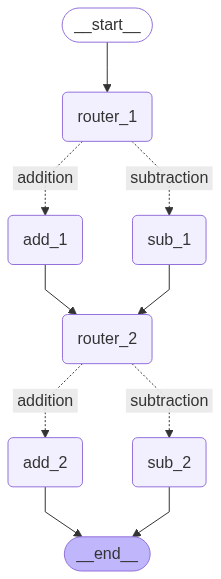

In [26]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))